## Import libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models
from imblearn.ensemble import BalancedRandomForestClassifier

# models trainng and optimization hyperparameters
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# model evaluation
import sklearn.metrics as metrics

# settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## Prepare and Analysis the Dataset

In [2]:
dataset = pd.read_csv('mexico_covid19.csv')
dataset = dataset[['EDAD', 'SEXO', 'NEUMONIA', 'DIABETES', 'ASMA', 'HIPERTENSION', 'OBESIDAD',
                   'CARDIOVASCULAR', 'OTRO_CASO', 'RESULTADO']]
dataset.rename(
    columns={'EDAD': 'Age', 'SEXO': 'Sex', 'NEUMONIA': 'Pneumonia', 'DIABETES': 'Diabetes', 'ASMA': 'Asthma',
             'HIPERTENSION': 'Hypertension', 'OBESIDAD': 'Obesity', 
             'CARDIOVASCULAR' : 'Cardiovascular', 'OTRO_CASO': 'Contact_diagnosed_person', 'RESULTADO' : 'Result'},
    inplace=True
)
print(dataset.columns)
dataset

Index(['Age', 'Sex', 'Pneumonia', 'Diabetes', 'Asthma', 'Hypertension',
       'Obesity', 'Cardiovascular', 'Contact_diagnosed_person', 'Result'],
      dtype='object')


,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Obesity,Cardiovascular,Contact_diagnosed_person,Result
0,74,2,2,1,2,1,1,2,2,2
1,71,1,2,1,2,1,1,2,99,2
2,50,2,1,2,2,2,2,2,99,1
3,25,1,2,2,2,2,1,2,99,1
4,28,1,2,2,2,2,2,2,99,2
...,...,...,...,...,...,...,...,...,...,...
263002,39,2,2,2,2,2,2,2,1,1
263003,53,1,1,1,2,2,1,2,99,1
263004,65,1,2,1,2,1,2,2,99,1
263005,71,2,1,2,2,1,2,2,2,1


In [3]:
dataset.describe()

,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Obesity,Cardiovascular,Contact_diagnosed_person,Result
count,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,42.591627,1.510682,1.842993,2.239712,2.300711,2.174185,2.184763,2.324980,32.283764,1.609672
std,16.903824,0.499887,0.798979,5.958047,5.682309,5.745114,5.817362,5.796086,45.350310,0.487825
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,53.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000
max,120.000000,2.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263007 entries, 0 to 263006
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Age                       263007 non-null  int64
 1   Sex                       263007 non-null  int64
 2   Pneumonia                 263007 non-null  int64
 3   Diabetes                  263007 non-null  int64
 4   Asthma                    263007 non-null  int64
 5   Hypertension              263007 non-null  int64
 6   Obesity                   263007 non-null  int64
 7   Cardiovascular            263007 non-null  int64
 8   Contact_diagnosed_person  263007 non-null  int64
 9   Result                    263007 non-null  int64
dtypes: int64(10)
memory usage: 20.1 MB


In [5]:
dataset['Result'] = dataset['Result'].astype(str).str.replace('2','0') # negative
dataset['Result'] = dataset['Result'].astype(str).str.replace('1','1') # positive
dataset = dataset.apply(pd.to_numeric, errors='ignore')

dataset

,Age,Sex,Pneumonia,Diabetes,Asthma,Hypertension,Obesity,Cardiovascular,Contact_diagnosed_person,Result
0,74,2,2,1,2,1,1,2,2,0
1,71,1,2,1,2,1,1,2,99,0
2,50,2,1,2,2,2,2,2,99,1
3,25,1,2,2,2,2,1,2,99,1
4,28,1,2,2,2,2,2,2,99,0
...,...,...,...,...,...,...,...,...,...,...
263002,39,2,2,2,2,2,2,2,1,1
263003,53,1,1,1,2,2,1,2,99,1
263004,65,1,2,1,2,1,2,2,99,1
263005,71,2,1,2,2,1,2,2,2,1


## Exploratory

In [6]:
dataset['Result'].value_counts(normalize=True) * 100

0    60.967199
1    39.032801
Name: Result, dtype: float64

In [7]:
categorical_columns = dataset.drop(['Age', 'Result'], axis='columns').columns
categorical_columns

Index(['Sex', 'Pneumonia', 'Diabetes', 'Asthma', 'Hypertension', 'Obesity',
       'Cardiovascular', 'Contact_diagnosed_person'],
      dtype='object')

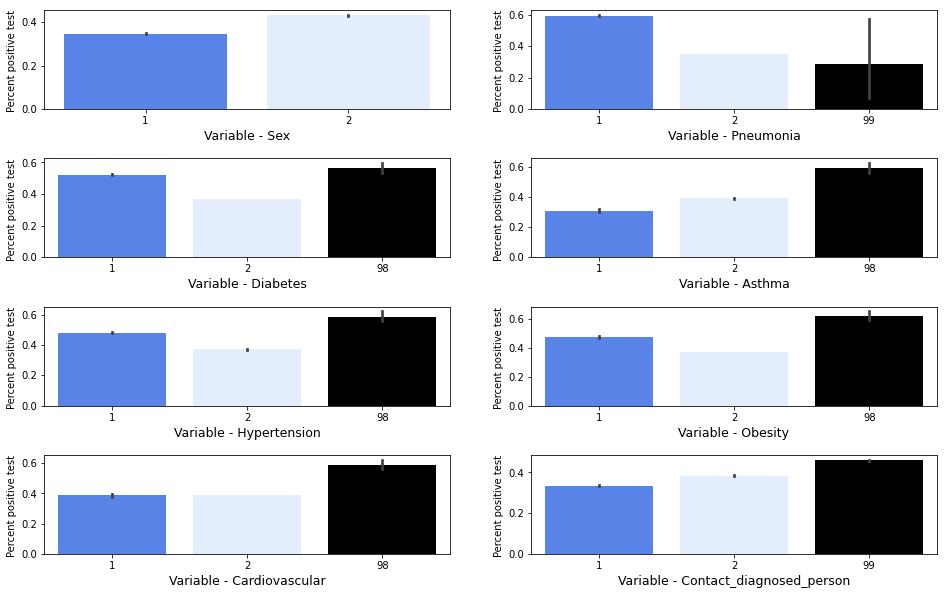

In [8]:
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace = 0.5)
row = 1
for column in categorical_columns:
    ax = fig.add_subplot(len(categorical_columns)/2,2,row)
    ax = sns.barplot(x=column, y="Result", data=dataset, palette=['#407BFF', '#E0ECFF', 'black'])
    ax.set_ylabel(ylabel='Percent positive test ', size=10)
    ax.set_xlabel(xlabel=f'Variable - {column}', size=12.5)
    row += 1
    
plt.savefig("01_barplots for categorical columns.png", transparent=True, dpi=200)
plt.show()

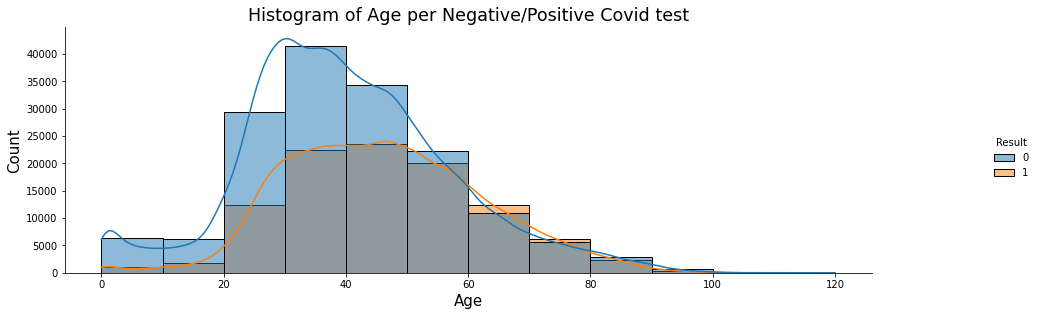

In [9]:
# plt.figure(figsize=(12, 8))
palette_result ={0:'#E0ECFF', 1:'#407BFF'}
sns_plot = sns.displot(data=dataset, x='Age', hue='Result', kde=True, bins=12)
plt.gcf().set_size_inches(16, 4)
plt.xlabel('Age', size=15)
plt.ylabel('Count', size=15)
plt.title('Histogram of Age per Negative/Positive Covid test', size=17.5)
sns_plot.savefig("02_histogram_of_age_per_covid_test.png", transparent=True, dpi=200)
plt.show()

# Train models

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Result', axis=1), 
                                                    dataset['Result'], 
                                                    test_size=0.2,
                                                    stratify=dataset['Result'],
                                                    random_state=42)

In [11]:
forest = BalancedRandomForestClassifier(max_depth=10, n_estimators=1000)

param_random_forest = {
    'max_depth': [3, 5, 10],
    'n_estimators': [300, 1000]
}

kfold = StratifiedKFold(n_splits=10)
random_forest = GridSearchCV(forest, param_random_forest, cv=kfold, scoring = 'f1', n_jobs = -1)
random_forest.fit(X_train, y_train)

print("The best estimator: ", random_forest.best_estimator_,
      "\nThe best score: ", random_forest.best_score_,
      "\nThe best parameters: ", random_forest.best_params_, sep="\n")

random_forest_model = random_forest.best_estimator_

The best estimator: 
BalancedRandomForestClassifier(max_depth=10, n_estimators=300)

The best score: 
0.5362619542713511

The best parameters: 
{'max_depth': 10, 'n_estimators': 300}


###### Feature Importance

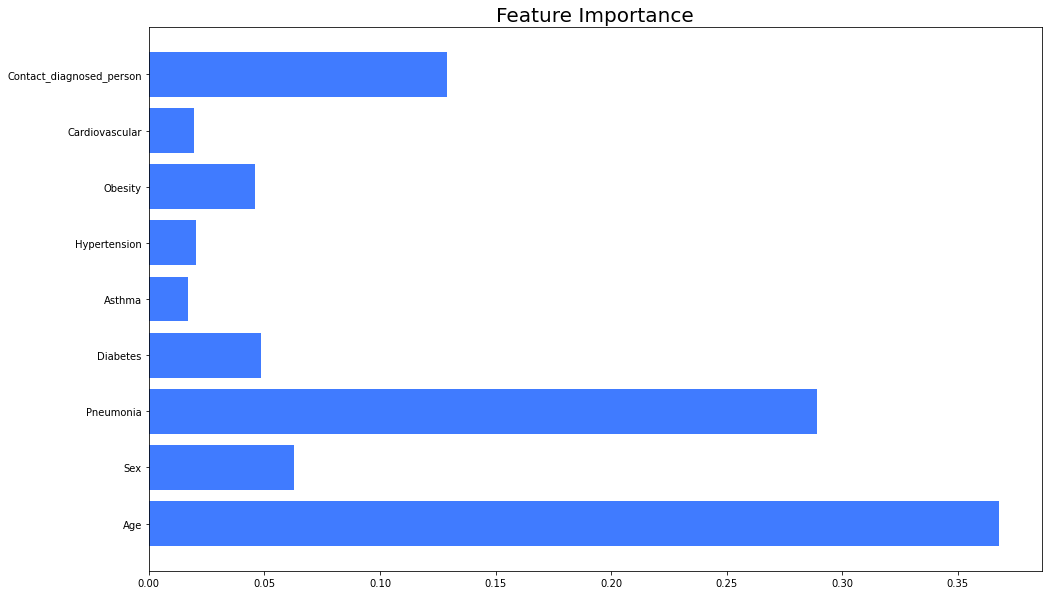

In [23]:
plt.figure(figsize=(16, 10))
plt.barh(X_test.columns, random_forest_model.feature_importances_, color='#407BFF')
plt.title('Feature Importance', size=20)
plt.savefig("03_feature_importance.png", transparent=True, dpi=200)
plt.show()

###### Evaluation

In [24]:
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

###### Precision - Recall - F-score

In [62]:
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F-score: {f1_score}')
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Precision: 0.5339357815804653
Recall: 0.5410091564387298
F-score: 0.5374491968260112
Accuracy: 0.6365157218356716


###### Confusion matrix

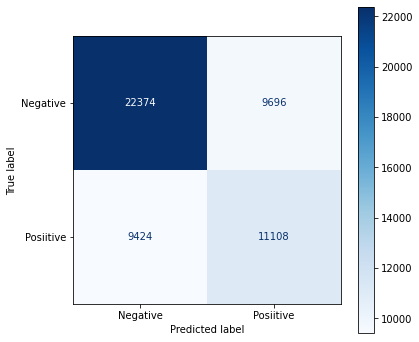

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
metrics.plot_confusion_matrix(random_forest_model, X_test, y_test, display_labels=['Negative', 'Posiitive'], 
                      cmap=plt.cm.Blues, normalize=None, ax=ax)
plt.show()

###### ROC Curve

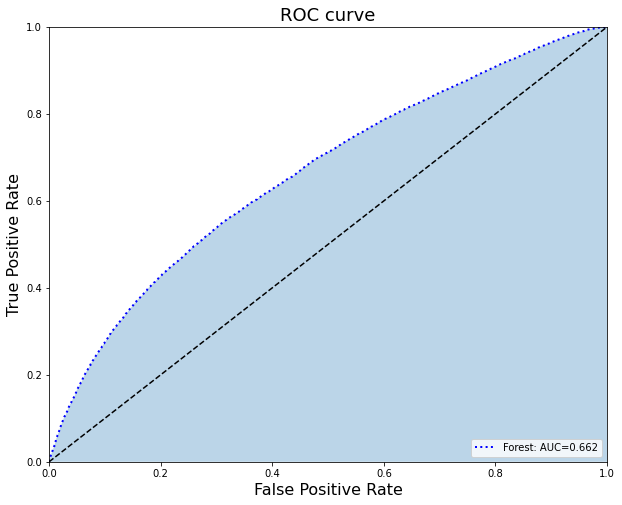

In [58]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, "b:", linewidth=2,
         label=f'Forest: AUC={np.round(metrics.roc_auc_score(y_test, y_pred_proba),3)}')
plt.fill_between(fpr, tpr, alpha=0.3)

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.title('ROC curve', fontsize=18)
plt.savefig("04_ROC_Curve.png", transparent=True, dpi=200)
plt.show()

###### Precision-Recall Curve

Logistic: f1=0.537 auc=0.662


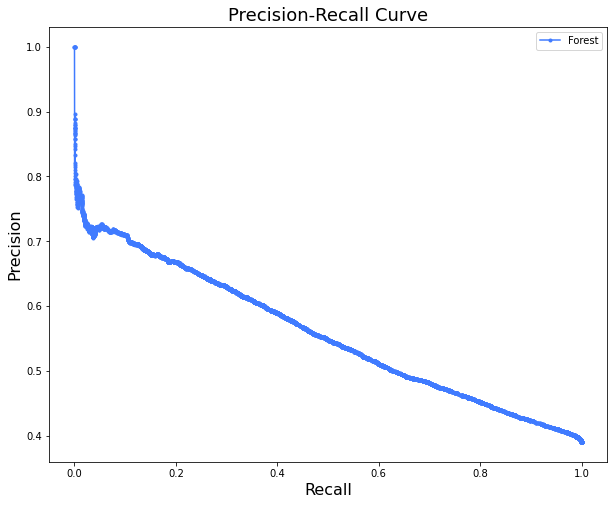

In [59]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, y_pred_proba)
lr_f1, lr_auc = metrics.f1_score(y_test, y_pred), metrics.auc(fpr, tpr)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.figure(figsize=(10, 8))
plt.plot(lr_recall, lr_precision, marker='.', label='Forest', color='#407BFF')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=18)
plt.legend()
plt.savefig("05_Precision_Recall_Curve.png", transparent=True, dpi=200)
plt.show()